In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

In [4]:
train=pd.read_csv('/content/drive/MyDrive/ACM/train.csv')
test=pd.read_csv('/content/drive/MyDrive/ACM/test.csv')

In [5]:
train.sample(5)

,CÓDIGO,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE,RENDIMIENTO_ACADÉMICO
100105,337921,20183,INGENIERÍA AMBIENTAL,AREQUIPA,Menos de 600 soles,0,Nivel D,Si,Primaria incompleta,No,No,N,No,Si,Si,Educación profesional completa,medio-alto
253998,400461,20195,PUBLICIDAD,CUSCO,Entre 2000 y menos de 3500 soles,Menos de 10 horas,Nivel C,Si,Secundaria (Bachillerato) completa,No,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
118538,983463,20195,PROFESIONAL EN CONTADURIA PUBLICA,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria completa,Si,No,N,Si,Si,Si,Primaria completa,medio-alto
160822,408113,20195,INGENIERIA INDUSTRIAL,TRUJILLO,Entre 3500 y menos de 4800 soles,Más de 30 horas,Nivel C,Si,Educación profesional completa,Si,No,N,Si,Si,Si,Educación profesional completa,medio-alto
204523,969362,20212,ECONOMIA,LIMA,Entre 3500 y menos de 4800 soles,Entre 11 y 20 horas,Nivel C,Si,No sabe,Si,No,N,No,Si,Si,No sabe,medio-alto


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275132 entries, 0 to 275131
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        275132 non-null  int64 
 1   PERIODO_RESULTADOS            275132 non-null  int64 
 2   CARRERA_PROFESIONAL           275132 non-null  object
 3   CIUDAD                        275132 non-null  object
 4   COSTO_MATRÍCULA_SOLES         272893 non-null  object
 5   HORAS_SEMANALES_TRABAJO       263595 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  263239 non-null  object
 7   CUENTA_CON_INTERNET           265366 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         266830 non-null  object
 9   CUENTA_CON_LAVADORA           260407 non-null  object
 10  TIENE_CARRO                   258962 non-null  object
 11  ANTECEDENTES_PENALES          275132 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  272801 non-null  object
 13 

In [7]:
train.duplicated().sum()

0

In [8]:
train.isnull().sum().sort_values(ascending=False)

,0
TIENE_CARRO,16170
CUENTA_CON_LAVADORA,14725
CUENTA_CON_ORDENADOR,14032
NIVEL_SOCIECONÓMICO_VIVIENDA,11893
HORAS_SEMANALES_TRABAJO,11537
CUENTA_CON_INTERNET.1,9766
CUENTA_CON_INTERNET,9766
NIVEL_EDUCATIVO_MADRE,8469
NIVEL_EDUCATIVO_PADRE,8302
PAGÓ_MATRÍCULA_POR_SU_CUENTA,2331


In [9]:
train.nunique()

,0
CÓDIGO,275132
PERIODO_RESULTADOS,9
CARRERA_PROFESIONAL,915
CIUDAD,31
COSTO_MATRÍCULA_SOLES,8
HORAS_SEMANALES_TRABAJO,5
NIVEL_SOCIECONÓMICO_VIVIENDA,6
CUENTA_CON_INTERNET,2
NIVEL_EDUCATIVO_PADRE,12
CUENTA_CON_LAVADORA,2


In [10]:
columnas_categoricas=train.select_dtypes(include=['object']).columns

for column in columnas_categoricas:
  if train[column].nunique() <= 15:
    print(f"{column}: {train[column].unique()}")

COSTO_MATRÍCULA_SOLES: ['Entre 850 y menos de 2000 soles' 'Entre 2000 y menos de 3500 soles'
 'Más de 6000 soles' 'Entre 3500 y menos de 4800 soles'
 'Entre 4800 y menos de 6000 soles' 'Entre 600 y menos de 850 soles'
 'Menos de 600 soles' 'No pagó matrícula' nan]
HORAS_SEMANALES_TRABAJO: ['Entre 11 y 20 horas' 'Más de 30 horas' 'Menos de 10 horas'
 'Entre 21 y 30 horas' nan '0']
NIVEL_SOCIECONÓMICO_VIVIENDA: ['Nivel D' 'Nivel C' 'Nivel E' 'Nivel B' nan 'Nivel A' 'Sin Clasificación']
CUENTA_CON_INTERNET: ['No' 'Si' nan]
NIVEL_EDUCATIVO_PADRE: ['Primaria incompleta' 'Primaria completa'
 'Educación profesional completa' 'Secundaria (Bachillerato) completa'
 'Técnica o tecnológica incompleta' 'Secundaria (Bachillerato) incompleta'
 'Postgrado' 'Técnica o tecnológica completa' nan
 'Educación profesional incompleta' 'No Aplica' 'No sabe' 'Ninguno']
CUENTA_CON_LAVADORA: ['Si' nan 'No']
TIENE_CARRO: ['Si' 'No' nan]
ANTECEDENTES_PENALES: ['N' 'S']
PAGÓ_MATRÍCULA_POR_SU_CUENTA: ['Si' 'No' nan]

eda

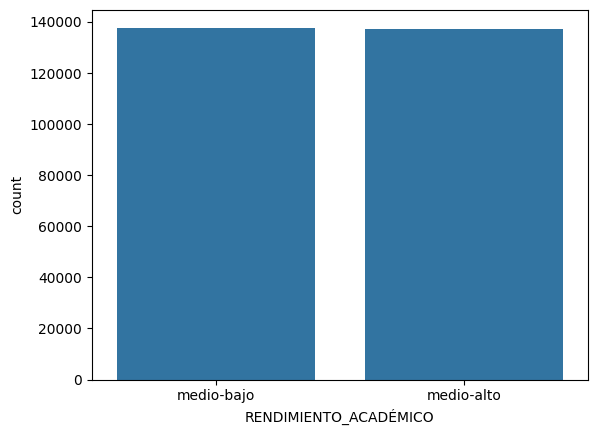

In [11]:
sns.countplot(x="RENDIMIENTO_ACADÉMICO",data=train)
plt.show()

en conclu

In [12]:
columnas_a_eliminar = [
    "CÓDIGO",
    "CUENTA_CON_INTERNET.1",

]

In [13]:
train = train.drop(columns=columnas_a_eliminar)

In [14]:
test = test.drop(columns=columnas_a_eliminar)

In [15]:
train.head()

,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,NIVEL_EDUCATIVO_MADRE,RENDIMIENTO_ACADÉMICO
0,20203,ADMINISTRACIÓN EN SALUD OCUPACIONAL,LIMA,Entre 850 y menos de 2000 soles,Entre 11 y 20 horas,Nivel D,No,Primaria incompleta,Si,Si,N,Si,No,Primaria incompleta,medio-bajo
1,20212,ADMINISTRACION DE EMPRESAS,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,N,Si,Si,Primaria incompleta,medio-alto
2,20183,INGENIERIA AMBIENTAL Y SANITARIA,CAJAMARCA,Entre 850 y menos de 2000 soles,Menos de 10 horas,Nivel D,No,Primaria completa,Si,No,N,No,Si,Primaria completa,medio-alto
3,20212,CONTADURIA PUBLICA,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,N,No,Si,Primaria completa,medio-bajo
4,20195,CONTADURIA PUBLICA,PIURA,Entre 2000 y menos de 3500 soles,Más de 30 horas,Nivel C,Si,Educación profesional completa,Si,No,N,No,Si,Secundaria (Bachillerato) incompleta,medio-alto


In [16]:
train.isnull().sum()

,0
PERIODO_RESULTADOS,0
CARRERA_PROFESIONAL,0
CIUDAD,0
COSTO_MATRÍCULA_SOLES,2239
HORAS_SEMANALES_TRABAJO,11537
NIVEL_SOCIECONÓMICO_VIVIENDA,11893
CUENTA_CON_INTERNET,9766
NIVEL_EDUCATIVO_PADRE,8302
CUENTA_CON_LAVADORA,14725
TIENE_CARRO,16170


In [17]:
# 1. Rellenar valores nulos para columnas categóricas binarias o similares con 'No'
binary_columns = ['CUENTA_CON_INTERNET', 'CUENTA_CON_ORDENADOR',
                  'CUENTA_CON_LAVADORA', 'TIENE_CARRO', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA']
train[binary_columns] = train[binary_columns].fillna('No')
test[binary_columns] = test[binary_columns].fillna('No')

# 2. Rellenar valores nulos para columnas ordinales con 'Desconocido'
ordinal_columns = ['NIVEL_EDUCATIVO_PADRE', 'NIVEL_EDUCATIVO_MADRE', 'NIVEL_SOCIECONÓMICO_VIVIENDA']
train[ordinal_columns] = train[ordinal_columns].fillna('Desconocido')
test[ordinal_columns] = test[ordinal_columns].fillna('Desconocido')
# 3. Rellenar valores nulos en columnas de rangos o clasificaciones con 'No especificado'
classified_columns = ['COSTO_MATRÍCULA_SOLES', 'HORAS_SEMANALES_TRABAJO']
train[classified_columns] = train[classified_columns].fillna('No especificado')
test[classified_columns] = test[classified_columns].fillna('No especificado')
# Verificar los valores nulos después del tratamiento
print("Valores nulos después del tratamiento:")
print(train.isnull().sum())

Valores nulos después del tratamiento:
PERIODO_RESULTADOS              0
CARRERA_PROFESIONAL             0
CIUDAD                          0
COSTO_MATRÍCULA_SOLES           0
HORAS_SEMANALES_TRABAJO         0
NIVEL_SOCIECONÓMICO_VIVIENDA    0
CUENTA_CON_INTERNET             0
NIVEL_EDUCATIVO_PADRE           0
CUENTA_CON_LAVADORA             0
TIENE_CARRO                     0
ANTECEDENTES_PENALES            0
PAGÓ_MATRÍCULA_POR_SU_CUENTA    0
CUENTA_CON_ORDENADOR            0
NIVEL_EDUCATIVO_MADRE           0
RENDIMIENTO_ACADÉMICO           0
dtype: int64


In [18]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


In [19]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
import pandas as pd

# Codificación binaria (Si/No)
binary_columns = ['CUENTA_CON_INTERNET', 'CUENTA_CON_ORDENADOR', 'CUENTA_CON_LAVADORA',
                  'TIENE_CARRO', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA']
for col in binary_columns:
    train[col] = train[col].map({'Si': 1, 'No': 0})
    test[col] = test[col].map({'Si': 1, 'No': 0})

train["ANTECEDENTES_PENALES"] = train["ANTECEDENTES_PENALES"].map({'S': 1, 'N': 0})
test["ANTECEDENTES_PENALES"] = test["ANTECEDENTES_PENALES"].map({'S': 1, 'N': 0})

# Codificación ordinal
ordinal_mapping = {
    'Nivel E': 1, 'Nivel D': 2, 'Nivel C': 3, 'Nivel B': 4, 'Nivel A': 5, 'Sin Clasificación': 0, 'Desconocido': -1
}
train['NIVEL_SOCIECONÓMICO_VIVIENDA'] = train['NIVEL_SOCIECONÓMICO_VIVIENDA'].map(ordinal_mapping)
test['NIVEL_SOCIECONÓMICO_VIVIENDA'] = test['NIVEL_SOCIECONÓMICO_VIVIENDA'].map(ordinal_mapping)

educational_level_mapping = {
    'Ninguno': 0, 'Primaria incompleta': 1, 'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3, 'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5, 'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7, 'Educación profesional completa': 8,
    'Postgrado': 9, 'No sabe': -1, 'No Aplica': -2, 'Desconocido': -1
}
train['NIVEL_EDUCATIVO_PADRE'] = train['NIVEL_EDUCATIVO_PADRE'].map(educational_level_mapping)
test['NIVEL_EDUCATIVO_PADRE'] = test['NIVEL_EDUCATIVO_PADRE'].map(educational_level_mapping)
train['NIVEL_EDUCATIVO_MADRE'] = train['NIVEL_EDUCATIVO_MADRE'].map(educational_level_mapping)
test['NIVEL_EDUCATIVO_MADRE'] = test['NIVEL_EDUCATIVO_MADRE'].map(educational_level_mapping)

# Codificación de variables categóricas (Target Encoding)
categorical_columns = ['CIUDAD', 'CARRERA_PROFESIONAL']
train['RENDIMIENTO_ACADÉMICO'] = train['RENDIMIENTO_ACADÉMICO'].map({'medio-bajo': 0, 'medio-alto': 1})

# Ajustar el TargetEncoder en train
encoder = TargetEncoder(cols=categorical_columns)
train[categorical_columns] = encoder.fit_transform(train[categorical_columns], train['RENDIMIENTO_ACADÉMICO'])

# Transformar test con el mismo TargetEncoder
test[categorical_columns] = encoder.transform(test[categorical_columns])

# Codificación de rangos (usando el mismo LabelEncoder ajustado en train)
classified_columns = ['COSTO_MATRÍCULA_SOLES', 'HORAS_SEMANALES_TRABAJO']
label_encoders = {}
for col in classified_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].fillna('No especificado'))
    test[col] = le.transform(test[col].fillna('No especificado'))  # Usar el mismo encoder ajustado en train
    label_encoders[col] = le  # Guardar el encoder por si se necesita más adelante



Train:
   PERIODO_RESULTADOS  CARRERA_PROFESIONAL    CIUDAD  COSTO_MATRÍCULA_SOLES  \
0               20203             0.295709  0.502018                      4   
1               20212             0.460570  0.502018                      4   
2               20183             0.554688  0.452272                      4   
3               20212             0.443329  0.502018                      4   
4               20195             0.443329  0.539031                      0   

   HORAS_SEMANALES_TRABAJO  NIVEL_SOCIECONÓMICO_VIVIENDA  CUENTA_CON_INTERNET  \
0                        1                             2                    0   
1                        4                             3                    1   
2                        3                             2                    0   
3                        4                             3                    1   
4                        4                             3                    1   

   NIVEL_EDUCATIVO_PADRE  CUENT

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275132 entries, 0 to 275131
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   PERIODO_RESULTADOS            275132 non-null  int64  
 1   CARRERA_PROFESIONAL           275132 non-null  float64
 2   CIUDAD                        275132 non-null  float64
 3   COSTO_MATRÍCULA_SOLES         275132 non-null  int64  
 4   HORAS_SEMANALES_TRABAJO       275132 non-null  int64  
 5   NIVEL_SOCIECONÓMICO_VIVIENDA  275132 non-null  int64  
 6   CUENTA_CON_INTERNET           275132 non-null  int64  
 7   NIVEL_EDUCATIVO_PADRE         275132 non-null  int64  
 8   CUENTA_CON_LAVADORA           275132 non-null  int64  
 9   TIENE_CARRO                   275132 non-null  int64  
 10  ANTECEDENTES_PENALES          275132 non-null  int64  
 11  PAGÓ_MATRÍCULA_POR_SU_CUENTA  275132 non-null  int64  
 12  CUENTA_CON_ORDENADOR          275132 non-nul

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68762 entries, 0 to 68761
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PERIODO_RESULTADOS            68762 non-null  int64  
 1   CARRERA_PROFESIONAL           68762 non-null  float64
 2   CIUDAD                        68762 non-null  float64
 3   COSTO_MATRÍCULA_SOLES         68762 non-null  int64  
 4   HORAS_SEMANALES_TRABAJO       68762 non-null  int64  
 5   NIVEL_SOCIECONÓMICO_VIVIENDA  68762 non-null  int64  
 6   CUENTA_CON_INTERNET           68762 non-null  int64  
 7   NIVEL_EDUCATIVO_PADRE         68762 non-null  int64  
 8   CUENTA_CON_LAVADORA           68762 non-null  int64  
 9   TIENE_CARRO                   68762 non-null  int64  
 10  ANTECEDENTES_PENALES          68762 non-null  int64  
 11  PAGÓ_MATRÍCULA_POR_SU_CUENTA  68762 non-null  int64  
 12  CUENTA_CON_ORDENADOR          68762 non-null  int64  
 13  N

In [22]:
X=train.drop(['RENDIMIENTO_ACADÉMICO'],axis=1)
Y=train.RENDIMIENTO_ACADÉMICO

In [23]:
X.head()

,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,NIVEL_EDUCATIVO_MADRE
0,20203,0.295709,0.502018,4,1,2,0,1,1,1,0,1,0,1
1,20212,0.460570,0.502018,4,4,3,1,1,1,0,0,1,1,1
2,20183,0.554688,0.452272,4,3,2,0,2,1,0,0,0,1,2
3,20212,0.443329,0.502018,4,4,3,1,1,1,0,0,0,1,2
4,20195,0.443329,0.539031,0,4,3,1,8,1,0,0,0,1,3


In [24]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(random_state=42)
model.fit(X, Y)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(test)


In [30]:
# Diccionario de inversión para decodificar
reverse_map = {0: 'medio-bajo', 1: 'medio-alto'}

# Supongamos que conservaste la columna CÓDIGO en X_test_original
X_test_original = pd.read_csv('/content/drive/MyDrive/ACM/test.csv')
codigos = X_test_original['CÓDIGO']  # Extraemos la columna CÓDIGO

# Creamos el DataFrame de submission
submission = pd.DataFrame({
    'CÓDIGO': codigos,
    'RENDIMIENTO_ACADÉMICO': y_pred
})

# Decodificar los valores de 'RENDIMIENTO_ACADÉMICO' de 0 y 1 a las categorías originales
submission['RENDIMIENTO_ACADÉMICO'] = submission['RENDIMIENTO_ACADÉMICO'].map(reverse_map)

# Guardamos el DataFrame en un archivo CSV
submission.to_csv('ABT.csv', index=False)


In [29]:
# prompt: exportar mi modelo de ml

import joblib

## Guardar el modelo entrenado con joblib
joblib.dump(model, 'ABT.pkl')

['ABT.pkl']